# #######Mandana Program Exam#######

# Import libraries

In [1114]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import xgboost as xgb
import tensorflow as tf

In [1115]:
import warnings
warnings.filterwarnings('ignore')

# Read Data

In [1116]:
dataset=pd.read_csv(r'D:\ML\Ahmad codes\data_for_distribution_Mandana.csv')

# EDA

In [1117]:
dataset.head()

,Unique_ID,holeid,from,to,As,Au,Pb,Fe,Mo,Cu,S,Zn,Class
0,A04812,SOLVE003,561,571.0,NaN,0.066000,1031.00,61380.0,138.2000,3.600,3586.0000,43.6000,A
1,A03356,SOLVE003,571,581.0,NaN,0.152000,1982.00,50860.0,75.4000,4.800,1822.0000,36.4000,A
2,A04764,SOLVE003,581,591.0,NaN,0.068000,1064.80,57940.0,29.2000,3.000,740.4000,36.6000,A
3,A04626,SOLVE003,591,601.0,NaN,0.074000,891.60,48620.0,63.0000,4.200,820.8000,39.6000,A
4,A05579,SOLVE003,601,611.0,NaN,0.043125,801.25,51025.0,56.0625,4.875,745.6875,32.3125,A


In [1118]:
dataset.tail()

,Unique_ID,holeid,from,to,As,Au,Pb,Fe,Mo,Cu,S,Zn,Class
3999,A06296,SOLVE225,1431,1441.0,12.2,0.0280,421.00,41100.0,20.80,10.00,22480.0,36.00,A
4000,A05391,SOLVE225,1441,1451.0,11.6,0.0480,359.40,56040.0,16.00,13.80,47540.0,63.00,A
4001,A06529,SOLVE225,1451,1461.0,26.6,0.0240,334.60,45660.0,9.60,4.80,31580.0,27.00,A
4002,A06648,SOLVE225,1461,1471.0,9.4,0.0220,280.00,41620.0,9.40,6.20,29000.0,28.40,A
4003,A06639,SOLVE225,1471,1479.0,5.5,0.0225,147.75,36525.0,11.75,5.25,20375.0,27.25,A


In [1119]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4004 entries, 0 to 4003
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Unique_ID  4004 non-null   object 
 1   holeid     4004 non-null   object 
 2   from       4004 non-null   int64  
 3   to         4004 non-null   float64
 4   As         2555 non-null   float64
 5   Au         3999 non-null   float64
 6   Pb         3991 non-null   float64
 7   Fe         3957 non-null   float64
 8   Mo         3982 non-null   float64
 9   Cu         3982 non-null   float64
 10  S          3994 non-null   float64
 11  Zn         3996 non-null   float64
 12  Class      4004 non-null   object 
dtypes: float64(9), int64(1), object(3)
memory usage: 406.8+ KB


In [1120]:
dataset.describe()

,from,to,As,Au,Pb,Fe,Mo,Cu,S,Zn
count,4004.000000,4004.000000,2555.000000,3999.000000,3991.000000,3957.000000,3982.000000,3982.000000,3994.000000,3996.000000
mean,728.554945,738.526598,18.130373,0.052106,713.742611,48938.541161,17.191211,13.651623,9707.850978,59.582381
std,433.013585,432.997777,32.694949,0.084710,938.786756,18510.395926,41.775380,117.061135,14948.823213,126.717073
min,81.000000,91.000000,1.000000,0.005000,1.700000,2080.000000,1.000000,1.000000,26.000000,5.600000
25%,421.000000,431.000000,5.200000,0.011000,151.200000,38420.000000,2.000000,3.000000,1281.000000,29.600000
50%,621.000000,631.000000,8.800000,0.028000,463.800000,48760.000000,5.600000,5.000000,3740.000000,37.600000
75%,911.000000,921.000000,18.600000,0.062000,996.000000,58560.000000,19.600000,8.600000,11740.000000,51.800000
max,2131.000000,2141.000000,827.800000,1.878000,29793.800000,331400.000000,1939.400000,6767.000000,217600.000000,3455.000000


In [1121]:
dataset.shape

(4004, 13)

In [1122]:
dataset.columns

Index(['Unique_ID', 'holeid', 'from', 'to', 'As', 'Au', 'Pb', 'Fe', 'Mo', 'Cu',
       'S', 'Zn', 'Class'],
      dtype='object')

In [1123]:
dataset.dtypes

Unique_ID     object
holeid        object
from           int64
to           float64
As           float64
Au           float64
Pb           float64
Fe           float64
Mo           float64
Cu           float64
S            float64
Zn           float64
Class         object
dtype: object

In [1124]:
dataset['Class'].unique()

array(['A', 'B'], dtype=object)

In [1125]:
dataset['Class'].value_counts()

A    2861
B    1143
Name: Class, dtype: int64

In [1126]:
dataset['Class'].value_counts(normalize=True)*100

A    71.453546
B    28.546454
Name: Class, dtype: float64

# Checking and handling null values

In [1127]:
dataset.isnull().sum()

Unique_ID       0
holeid          0
from            0
to              0
As           1449
Au              5
Pb             13
Fe             47
Mo             22
Cu             22
S              10
Zn              8
Class           0
dtype: int64

In [1128]:
#deleting columns of 'Unique_ID', 'holeid', 'As'

In [1129]:
dataset2=dataset.drop(['Unique_ID','holeid', 'As'], axis = 1)

In [1130]:
dataset2.head()

,from,to,Au,Pb,Fe,Mo,Cu,S,Zn,Class
0,561,571.0,0.066000,1031.00,61380.0,138.2000,3.600,3586.0000,43.6000,A
1,571,581.0,0.152000,1982.00,50860.0,75.4000,4.800,1822.0000,36.4000,A
2,581,591.0,0.068000,1064.80,57940.0,29.2000,3.000,740.4000,36.6000,A
3,591,601.0,0.074000,891.60,48620.0,63.0000,4.200,820.8000,39.6000,A
4,601,611.0,0.043125,801.25,51025.0,56.0625,4.875,745.6875,32.3125,A


In [1131]:
# Replacde null values with mean

In [1132]:
dataset3=dataset2.copy()

In [1133]:
dataset3.fillna(dataset3.median(),inplace=True)

In [1134]:
dataset3.isnull().sum()

from     0
to       0
Au       0
Pb       0
Fe       0
Mo       0
Cu       0
S        0
Zn       0
Class    0
dtype: int64

In [1135]:
dataset3.head()

,from,to,Au,Pb,Fe,Mo,Cu,S,Zn,Class
0,561,571.0,0.066000,1031.00,61380.0,138.2000,3.600,3586.0000,43.6000,A
1,571,581.0,0.152000,1982.00,50860.0,75.4000,4.800,1822.0000,36.4000,A
2,581,591.0,0.068000,1064.80,57940.0,29.2000,3.000,740.4000,36.6000,A
3,591,601.0,0.074000,891.60,48620.0,63.0000,4.200,820.8000,39.6000,A
4,601,611.0,0.043125,801.25,51025.0,56.0625,4.875,745.6875,32.3125,A


# Encoding

In [1136]:
dataset3.replace({'Class':{'A':0,'B':1}},inplace=True);dataset3.head()

,from,to,Au,Pb,Fe,Mo,Cu,S,Zn,Class
0,561,571.0,0.066000,1031.00,61380.0,138.2000,3.600,3586.0000,43.6000,0
1,571,581.0,0.152000,1982.00,50860.0,75.4000,4.800,1822.0000,36.4000,0
2,581,591.0,0.068000,1064.80,57940.0,29.2000,3.000,740.4000,36.6000,0
3,591,601.0,0.074000,891.60,48620.0,63.0000,4.200,820.8000,39.6000,0
4,601,611.0,0.043125,801.25,51025.0,56.0625,4.875,745.6875,32.3125,0


# Plot

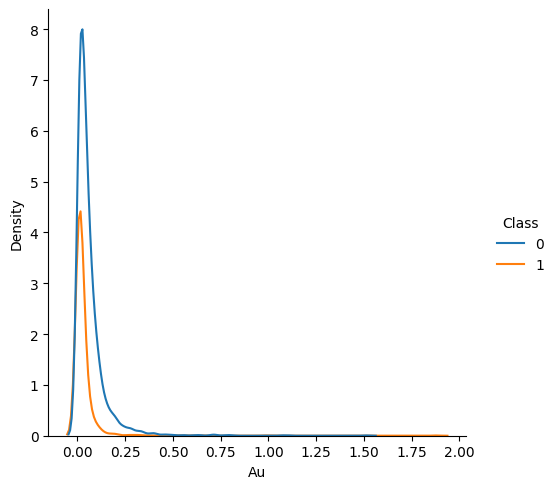

In [1137]:
sns.displot(dataset3, x="Au", hue="Class",kind="kde")

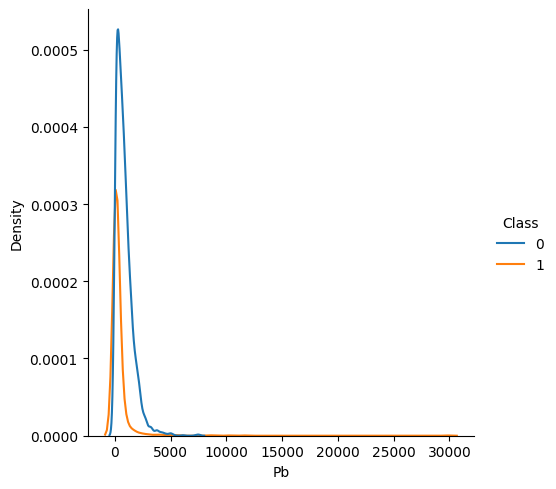

In [1138]:
sns.displot(dataset3, x="Pb", hue="Class",kind="kde")

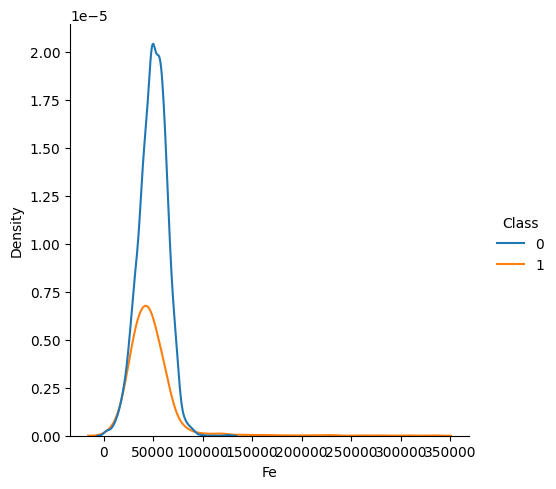

In [1139]:
sns.displot(dataset3, x="Fe", hue="Class",kind="kde")

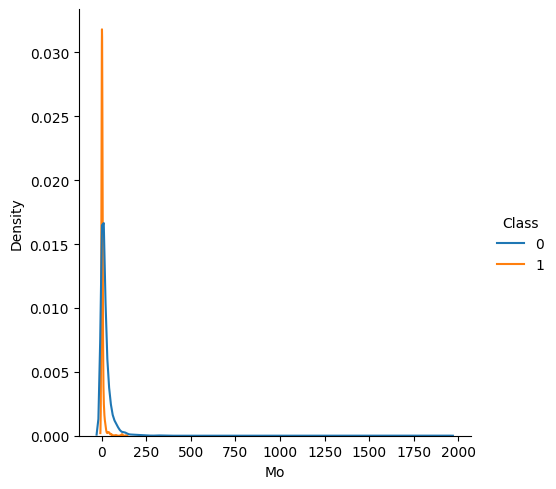

In [1140]:
sns.displot(dataset3, x="Mo", hue="Class",kind="kde")

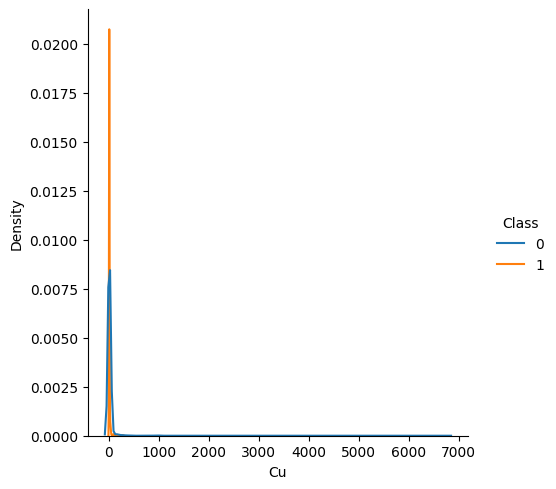

In [1141]:
sns.displot(dataset3, x="Cu", hue="Class",kind="kde")

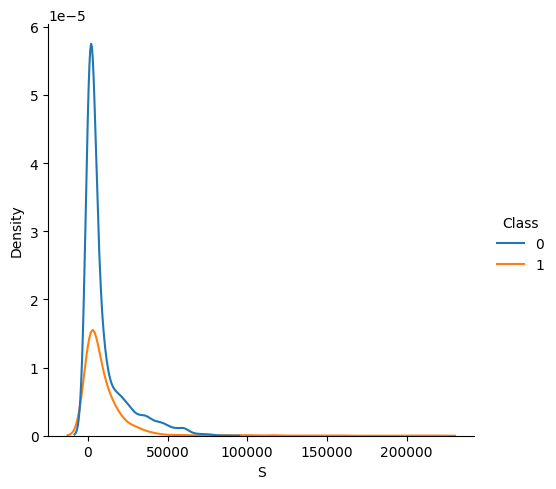

In [1142]:
sns.displot(dataset3, x="S", hue="Class",kind="kde")

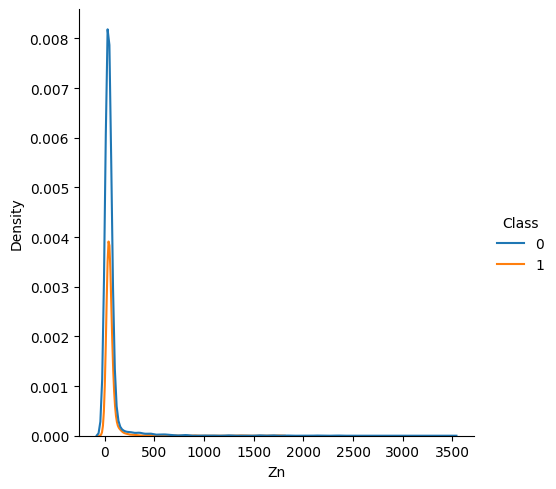

In [1143]:
sns.displot(dataset3, x="Zn", hue="Class",kind="kde")

In [1144]:
corr=dataset3.corr()

In [1145]:
corr

,from,to,Au,Pb,Fe,Mo,Cu,S,Zn,Class
from,1.000000,1.000000,0.200486,-0.044874,-0.187011,-0.086300,-0.034759,0.009413,-0.074816,-0.269938
to,1.000000,1.000000,0.200482,-0.044890,-0.187011,-0.086320,-0.034757,0.009418,-0.074811,-0.269913
Au,0.200486,0.200482,1.000000,0.526675,0.142574,0.118637,0.068970,0.059661,0.165132,-0.166006
Pb,-0.044874,-0.044890,0.526675,1.000000,0.265780,0.316079,0.040235,0.068519,0.070869,-0.246129
Fe,-0.187011,-0.187011,0.142574,0.265780,1.000000,0.052791,0.016699,0.413220,0.095256,-0.066656
Mo,-0.086300,-0.086320,0.118637,0.316079,0.052791,1.000000,0.031160,-0.046310,0.036899,-0.182977
Cu,-0.034759,-0.034757,0.068970,0.040235,0.016699,0.031160,1.000000,0.039312,0.658086,-0.029035
S,0.009413,0.009418,0.059661,0.068519,0.413220,-0.046310,0.039312,1.000000,0.082442,0.012200
Zn,-0.074816,-0.074811,0.165132,0.070869,0.095256,0.036899,0.658086,0.082442,1.000000,-0.003250
Class,-0.269938,-0.269913,-0.166006,-0.246129,-0.066656,-0.182977,-0.029035,0.012200,-0.003250,1.000000


<AxesSubplot:>

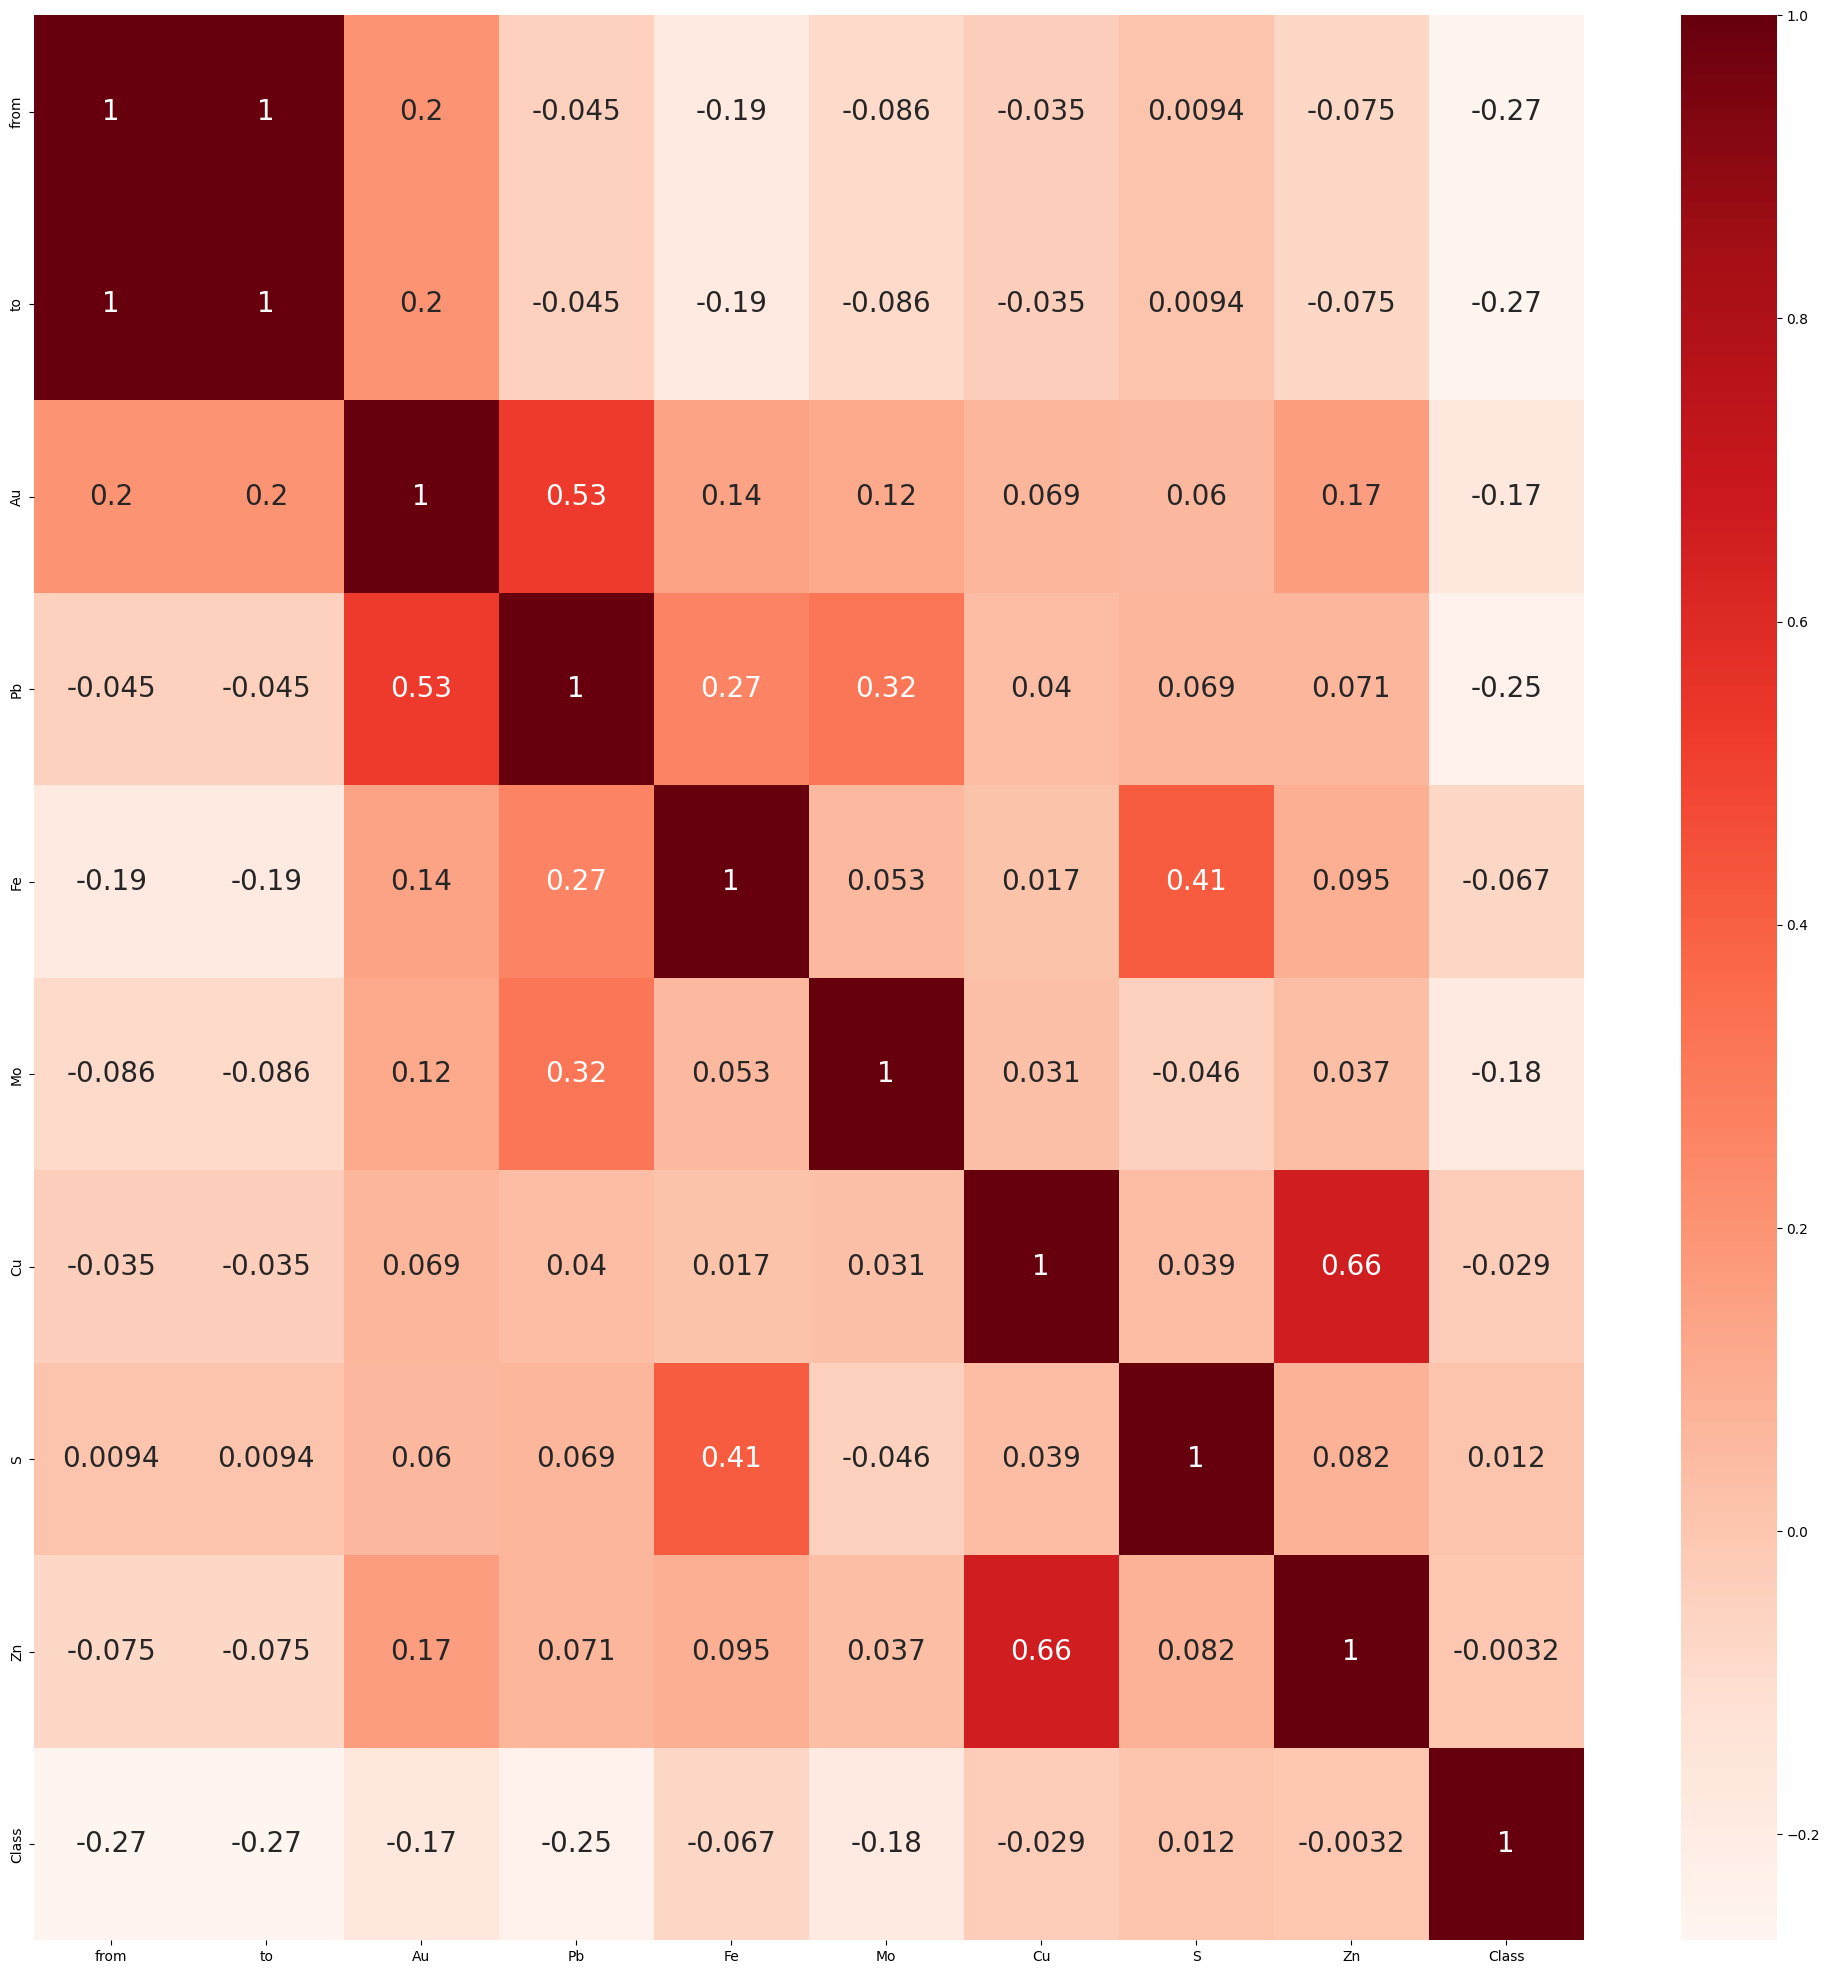

In [1146]:
plt.figure(figsize=(25,25))
sns.heatmap(corr,cbar=True,annot=True,annot_kws={'size':20},cmap='Reds')

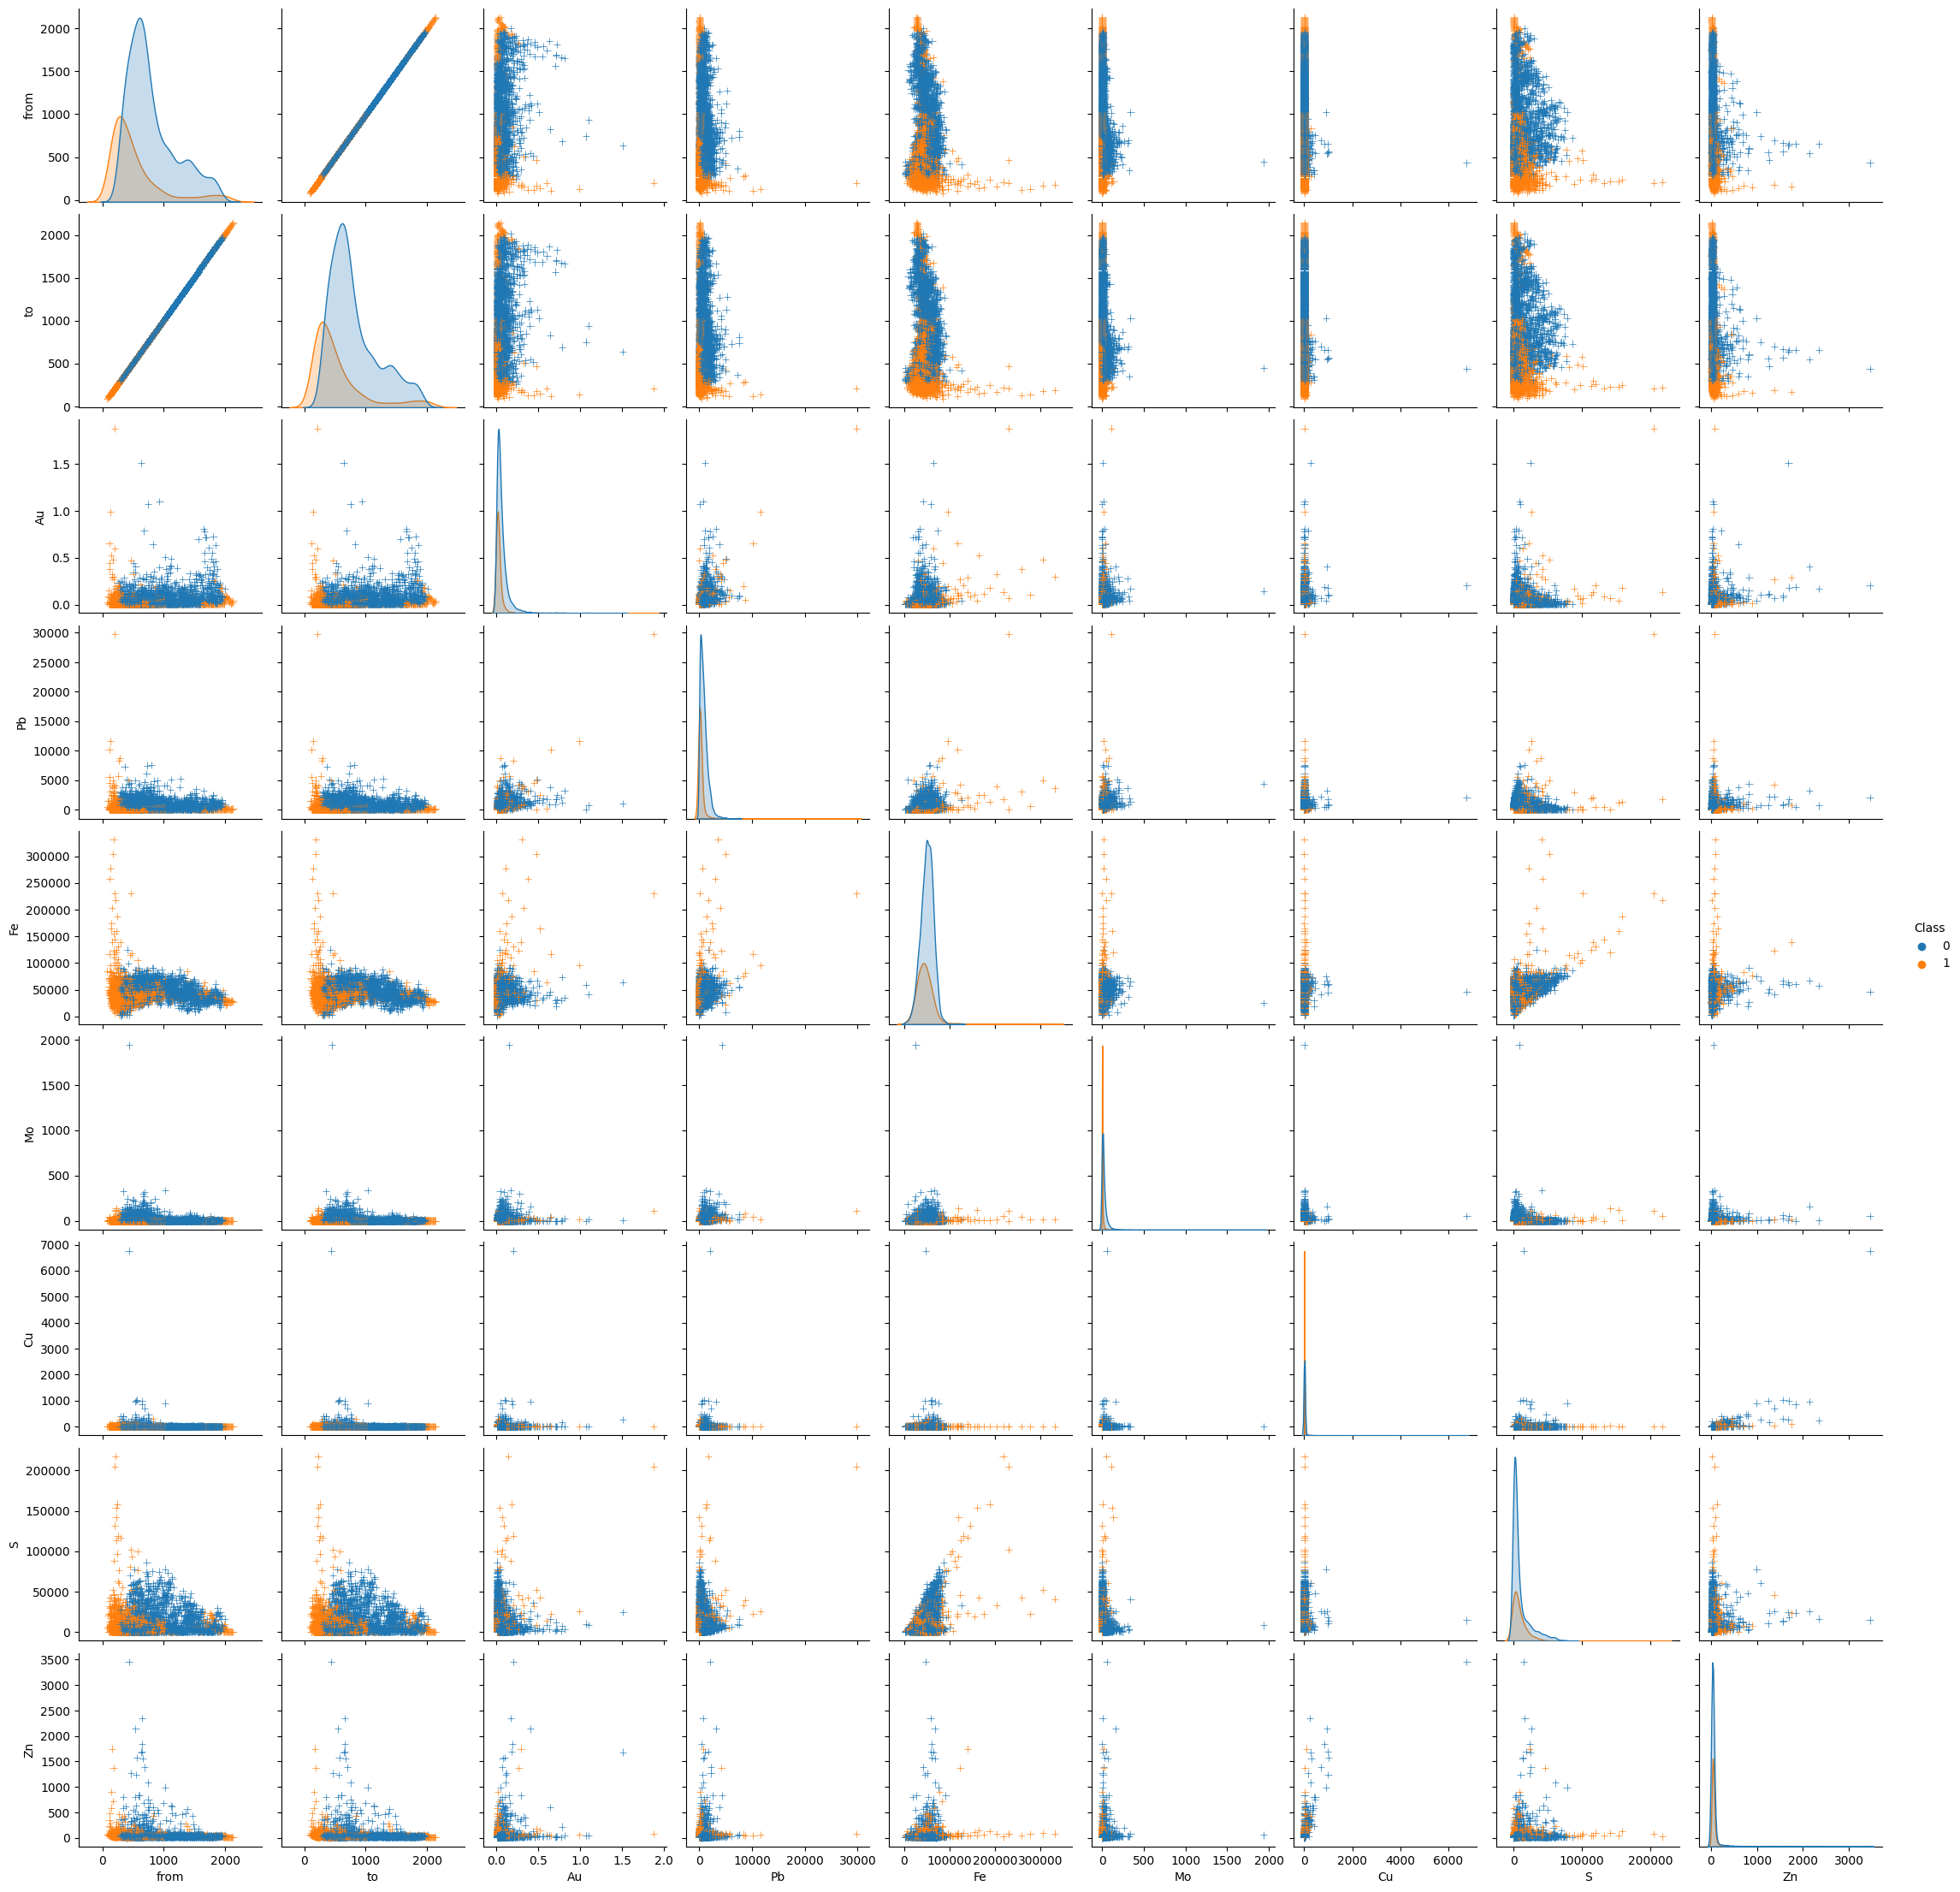

In [1147]:
sns.pairplot(dataset3,hue='Class',markers='+');plt.show()

# Train Test splite

In [1148]:
x=dataset3.iloc[:,0:-1].values
y=dataset3.iloc[:,-1].values

In [1149]:
print(x)

[[5.6100e+02 5.7100e+02 6.6000e-02 ... 3.6000e+00 3.5860e+03 4.3600e+01]
 [5.7100e+02 5.8100e+02 1.5200e-01 ... 4.8000e+00 1.8220e+03 3.6400e+01]
 [5.8100e+02 5.9100e+02 6.8000e-02 ... 3.0000e+00 7.4040e+02 3.6600e+01]
 ...
 [1.4510e+03 1.4610e+03 2.4000e-02 ... 4.8000e+00 3.1580e+04 2.7000e+01]
 [1.4610e+03 1.4710e+03 2.2000e-02 ... 6.2000e+00 2.9000e+04 2.8400e+01]
 [1.4710e+03 1.4790e+03 2.2500e-02 ... 5.2500e+00 2.0375e+04 2.7250e+01]]


In [1150]:
print(y)

[0 0 0 ... 0 0 0]


In [1151]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

# feature scaling

In [1152]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

# Classification Model by logestic regression & QC (Example: IRIS problem)

In [1153]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [1154]:
logreg=LogisticRegression()
logreg.fit(x_train,y_train)

LogisticRegression()

In [1155]:
y_pred_LR=logreg.predict(x_test)

In [1156]:
print('accuracy:',(metrics.accuracy_score(y_test,y_pred_LR)))

accuracy: 0.8389513108614233


In [1157]:
# confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred_LR)

array([[548,  42],
       [ 87, 124]], dtype=int64)

In [1158]:
# accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_LR)

0.8389513108614233

In [1159]:
# recall
from sklearn.metrics import recall_score
recall_score(y_test,y_pred_LR)

0.5876777251184834

In [1160]:
# precision
from sklearn.metrics import precision_score
precision_score(y_test,y_pred_LR)

0.7469879518072289

In [1161]:
# f1 score
from sklearn.metrics import f1_score
f1_score(y_test,y_pred_LR)

0.6578249336870027

# Classification Model by XGboost & QC (Example: IRIS problem)

In [1162]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [1163]:
model_XGB=XGBClassifier()
model_XGB.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [1164]:
y_pred_XGB=model_XGB.predict(x_test)

In [1165]:
print('accuracy:',(metrics.accuracy_score(y_test,y_pred_XGB)))

accuracy: 0.9101123595505618


In [1166]:
# confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred_XGB)

array([[555,  35],
       [ 37, 174]], dtype=int64)

In [1167]:
# accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_XGB)

0.9101123595505618

In [1168]:
# recall
from sklearn.metrics import recall_score
recall_score(y_test,y_pred_XGB)

0.8246445497630331

In [1169]:
# precision
from sklearn.metrics import precision_score
precision_score(y_test,y_pred_XGB)

0.8325358851674641

In [1170]:
# f1 score
from sklearn.metrics import f1_score
f1_score(y_test,y_pred_XGB)

0.8285714285714286

# Classification Model by DecisionTree & QC (Example: IRIS problem)

In [1171]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(criterion='entropy',random_state=2)
classifier.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=2)

In [1172]:
y_pred_DT=classifier.predict(x_test)

In [1173]:
print('accuracy:',(metrics.accuracy_score(y_test,y_pred_DT)))

accuracy: 0.8826466916354557


In [1174]:
# accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_DT)

0.8826466916354557

In [1175]:
# recall
from sklearn.metrics import recall_score
recall_score(y_test,y_pred_DT)

0.8199052132701422

In [1176]:
# precision
from sklearn.metrics import precision_score
precision_score(y_test,y_pred_DT)

0.7554585152838428

In [1177]:
# f1 score
from sklearn.metrics import f1_score
f1_score(y_test,y_pred_DT)

0.7863636363636364

# Classification Model by RandomForest & QC (Example: IRIS problem)

In [1178]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(criterion='entropy',random_state=42)
rfc.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', random_state=42)

In [1179]:
y_pred_RF=rfc.predict(x_test)

In [1180]:
print('accuracy:',(metrics.accuracy_score(y_test,y_pred_RF)))

accuracy: 0.9176029962546817


In [1181]:
# accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_RF)

0.9176029962546817

In [1182]:
# recall
from sklearn.metrics import recall_score
recall_score(y_test,y_pred_RF)

0.8199052132701422

In [1183]:
# precision
from sklearn.metrics import precision_score
precision_score(y_test,y_pred_RF)

0.8606965174129353

In [1184]:
# f1 score
from sklearn.metrics import f1_score
f1_score(y_test,y_pred_RF)

0.8398058252427185

# Classification Model by ANN & QC (Example: IRIS problem)

In [1185]:
ann=tf.keras.models.Sequential()

In [1186]:
# add first hidden layer
ann.add(tf.keras.layers.Dense(units=6,activation='relu'))

In [1187]:
# add second hidden layer
ann.add(tf.keras.layers.Dense(units=6,activation='relu'))

In [1188]:
# add output layer
ann.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

In [1189]:
ann.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [1190]:
# taing ANN on training set
ann.fit(x_train,y_train,batch_size=32,epochs=200)

Epoch 1/200
101/101 [==============================] - 1s 2ms/step - loss: 0.7315 - accuracy: 0.5098
Epoch 2/200
101/101 [==============================] - 0s 2ms/step - loss: 0.6108 - accuracy: 0.7215
Epoch 3/200
101/101 [==============================] - 0s 2ms/step - loss: 0.5292 - accuracy: 0.7818
Epoch 4/200
101/101 [==============================] - 0s 2ms/step - loss: 0.4657 - accuracy: 0.8224
Epoch 5/200
101/101 [==============================] - 0s 2ms/step - loss: 0.4202 - accuracy: 0.8339
Epoch 6/200
101/101 [==============================] - 0s 2ms/step - loss: 0.3931 - accuracy: 0.8426
Epoch 7/200
101/101 [==============================] - 0s 2ms/step - loss: 0.3771 - accuracy: 0.8476
Epoch 8/200
101/101 [==============================] - 0s 2ms/step - loss: 0.3648 - accuracy: 0.8476
Epoch 9/200
101/101 [==============================] - 0s 2ms/step - loss: 0.3562 - accuracy: 0.8498
Epoch 10/200
101/101 [==============================] - 0s 3ms/step - loss: 0.3489 - accura

In [1191]:
y_pred_ANN=ann.predict(x_test)
y_pred_ANN=(y_pred_ANN>0.5)

26/26 [==============================] - 0s 2ms/step


In [1192]:
# accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_ANN)


0.8514357053682896

In [1193]:
# recall
from sklearn.metrics import recall_score
recall_score(y_test,y_pred_ANN)

0.6872037914691943

In [1194]:
# precision
from sklearn.metrics import precision_score
precision_score(y_test,y_pred_ANN)

0.7323232323232324

In [1195]:
# f1 score
from sklearn.metrics import f1_score
f1_score(y_test,y_pred_RF)

0.8398058252427185

# Classification Model by SVC & QC (Example: IRIS problem)

In [1196]:
from sklearn.svm import SVC
classifier_SVC=SVC(kernel='rbf',random_state=0)

In [1197]:
classifier_SVC.fit(x_train,y_train)

SVC(random_state=0)

In [1198]:
y_pred_SVC=classifier_SVC.predict(x_test)

In [1199]:
# accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_SVC)

0.8601747815230961

In [1200]:
# recall
from sklearn.metrics import recall_score
recall_score(y_test,y_pred_SVC)

0.6492890995260664

In [1201]:
# precision
from sklearn.metrics import precision_score
precision_score(y_test,y_pred_SVC)

0.7828571428571428

In [1202]:
# f1 score
from sklearn.metrics import f1_score
f1_score(y_test,y_pred_SVC)

0.7098445595854922

# Select XGBoost as best method
# Parameter test for XGBoost using Grid search

In [1203]:
from sklearn.model_selection import GridSearchCV

In [1204]:
parameters = {
    'min_child_weight': [1, 5, 10],
    'max_depth': range (2, 10, 1),
    'gamma': [0.5, 1, 1.5, 2, 5],
    'subsample': [0.6, 0.8, 1.0],
    'n_estimators': range(60, 220, 40),
    'colsample_bytree': [0.6, 0.8, 1.0],
    'learning_rate': [0.1, 0.01, 0.05]
}

grid_search=GridSearchCV(estimator=model_XGB,
                        param_grid=parameters,
                        scoring='accuracy',
                        cv=10,
                        n_jobs=-1)

grid_search.fit(x_train,y_train)

best_accuracy=grid_search.best_score_
print("best accuracy: {:.2f} %".format(best_accuracy*100))

best_parameters=grid_search.best_params_
print("Best parameters:",best_parameters)

# Applying again XGBoost with best parameters

In [1205]:
model_XGB2=XGBClassifier(learning_rate=0.1,max_depth=7,n_estimators=180)

In [1206]:
model_XGB2.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=180, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

# Applying the best algorithm on unseen data

# Read Unseen data

In [1207]:
dataset_Unseen=pd.read_csv(r'D:\ML\Ahmad codes\data_for_distribution_Mandana_Unseen.csv')

In [1208]:
dataset_Unseen.head()

,Unique_ID,holeid,from,to,As,Au,Pb,Fe,Mo,Cu,S,Zn
0,A04920,SOLVE225W1,581,591.0,3.25,0.0625,484.0,60125.0,36.5,2.5,450.0,31.25
1,A05729,SOLVE225W1,591,601.0,3.00,0.0400,661.0,50780.0,55.8,3.2,1120.0,38.20
2,A05270,SOLVE225W1,601,611.0,3.20,0.0520,844.2,51260.0,47.6,3.4,1300.0,34.20
3,A05634,SOLVE225W1,611,621.0,4.20,0.0420,414.8,42840.0,22.2,3.2,1020.0,45.00
4,A04689,SOLVE225W1,621,631.0,7.40,0.0720,868.2,71620.0,157.0,4.2,10800.0,40.40


In [1209]:
dataset_Unseen2=dataset_Unseen.drop(['Unique_ID','holeid', 'As'], axis = 1)

In [1210]:
dataset_Unseen2.head()

,from,to,Au,Pb,Fe,Mo,Cu,S,Zn
0,581,591.0,0.0625,484.0,60125.0,36.5,2.5,450.0,31.25
1,591,601.0,0.0400,661.0,50780.0,55.8,3.2,1120.0,38.20
2,601,611.0,0.0520,844.2,51260.0,47.6,3.4,1300.0,34.20
3,611,621.0,0.0420,414.8,42840.0,22.2,3.2,1020.0,45.00
4,621,631.0,0.0720,868.2,71620.0,157.0,4.2,10800.0,40.40


In [1211]:
dataset_Unseen2.isnull().sum()

from     0
to       0
Au       1
Pb       2
Fe      15
Mo       8
Cu       3
S        0
Zn       1
dtype: int64

In [1212]:
dataset_Unseen3=dataset_Unseen2.copy()

In [1213]:
dataset_Unseen3.fillna(dataset_Unseen3.median(),inplace=True)

In [1214]:
dataset_Unseen3.isnull().sum()

from    0
to      0
Au      0
Pb      0
Fe      0
Mo      0
Cu      0
S       0
Zn      0
dtype: int64

In [1215]:
dataset_Unseen3.head()

,from,to,Au,Pb,Fe,Mo,Cu,S,Zn
0,581,591.0,0.0625,484.0,60125.0,36.5,2.5,450.0,31.25
1,591,601.0,0.0400,661.0,50780.0,55.8,3.2,1120.0,38.20
2,601,611.0,0.0520,844.2,51260.0,47.6,3.4,1300.0,34.20
3,611,621.0,0.0420,414.8,42840.0,22.2,3.2,1020.0,45.00
4,621,631.0,0.0720,868.2,71620.0,157.0,4.2,10800.0,40.40


In [1216]:
x_unseen=dataset_Unseen3.iloc[:,:].values

In [1217]:
print(x_unseen)

[[5.810e+02 5.910e+02 6.250e-02 ... 2.500e+00 4.500e+02 3.125e+01]
 [5.910e+02 6.010e+02 4.000e-02 ... 3.200e+00 1.120e+03 3.820e+01]
 [6.010e+02 6.110e+02 5.200e-02 ... 3.400e+00 1.300e+03 3.420e+01]
 ...
 [1.301e+03 1.311e+03 2.400e-02 ... 3.000e+00 6.160e+03 3.460e+01]
 [1.311e+03 1.321e+03 1.100e-02 ... 4.000e+00 5.700e+03 3.340e+01]
 [1.321e+03 1.331e+03 9.000e-03 ... 3.000e+00 3.140e+03 2.960e+01]]


In [1218]:
x_unseen=sc.transform(x_unseen)

In [1219]:
y_pred_XGB_unseen=model_XGB2.predict(x_unseen)

In [1220]:
print(y_pred_XGB_unseen)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 0 1 0 0 1 1 1 0 1 1 1 1 0 1 0 0 1 0 1 0 1
 0 0 0 0 0 1 1 0 0 1 1 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0
 0 0 0 0 1 1 1 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 1 1 

In [1221]:
# convert numpy ndarray to dataframe
Class_y= pd.DataFrame(y_pred_XGB_unseen, columns = ['Class'])
Class_y.head()

,Class
0,0
1,0
2,0
3,0
4,0


In [1222]:
Class_y.shape

(767, 1)

In [1223]:
dataset_Unseen3.shape

(767, 9)

In [1224]:
# Combining dataframes
# Place the DataFrames side by side
Final_Result = pd.concat([dataset_Unseen3, Class_y], axis=1)
Final_Result.head()

,from,to,Au,Pb,Fe,Mo,Cu,S,Zn,Class
0,581,591.0,0.0625,484.0,60125.0,36.5,2.5,450.0,31.25,0
1,591,601.0,0.0400,661.0,50780.0,55.8,3.2,1120.0,38.20,0
2,601,611.0,0.0520,844.2,51260.0,47.6,3.4,1300.0,34.20,0
3,611,621.0,0.0420,414.8,42840.0,22.2,3.2,1020.0,45.00,0
4,621,631.0,0.0720,868.2,71620.0,157.0,4.2,10800.0,40.40,0


In [1225]:
Final_Result.to_csv(r'D:\ML\Ahmad codes\data_for_distribution_Mandana_Unseen_FinalResult.csv')